<a href="https://colab.research.google.com/github/alex-smith-uwec/NLP_Spring2025/blob/main/StateUnion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datasets import load_dataset
from collections import Counter

import nltk
from nltk.draw.dispersion import dispersion_plot

In [3]:
# Load the dataset
dataset = load_dataset("jsulz/state-of-the-union-addresses")

# Extract the necessary columns
dates = [item["date"] for item in dataset["train"]]
texts = [item["lemmatized"] for item in dataset["train"]]

# Combine dates and texts, then sort by dates
sorted_data = sorted(zip(dates, texts), key=lambda x: x[0])
sorted_dates, sorted_texts = zip(*sorted_data)

# Convert back to lists if needed
sorted_dates = list(sorted_dates)

# Replace dates with just the year
sorted_years = [date.year for date in sorted_dates]
sorted_texts = list(sorted_texts)



README.md:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

sotu.parquet:   0%|          | 0.00/20.9M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/245 [00:00<?, ? examples/s]

In [4]:
print(f"{sorted_years[2]}")
len(sorted_texts[2])

1791


956

In [5]:
# Verify the sorting
print(sorted_dates[-2:])

[Timestamp('2023-02-07 00:00:00'), Timestamp('2024-03-07 00:00:00')]


In [6]:
# Tokenize all texts and count word frequencies
all_words = []
for text in sorted_texts:
    # text is a list of words, so we can directly extend all_words
    all_words.extend(text)
word_counts = Counter(all_words)

In [7]:
all_words[0:10]

['embrace',
 'great',
 'satisfaction',
 'opportunity',
 'present',
 'congratulate',
 'present',
 'favorable',
 'prospect',
 'public']

In [8]:
# Get the most common words (excluding stopwords, if desired)
most_common_words = [word for word, freq in word_counts.most_common(10)]  # Adjust '10' for desired number

# Print the most common words
print("Most Common Words:", most_common_words)

# Prepare data for the lexical dispersion plot
word_occurrences = {word: [] for word in most_common_words}

for i, text in enumerate(texts):
    # text is already a list of tokens, no need to split
    tokens = text
    for word in most_common_words:
        word_occurrences[word].append(tokens.index(word) if word in tokens else None)



Most Common Words: ['state', 'government', 'year', 'make', 'congress', 'country', 'people', 'great', 'would', 'united']


In [9]:
focus_words=["science","liberty","waste","fraud","technology","god","woman","slave","poverty","computer"]

<Figure size 1200x900 with 0 Axes>

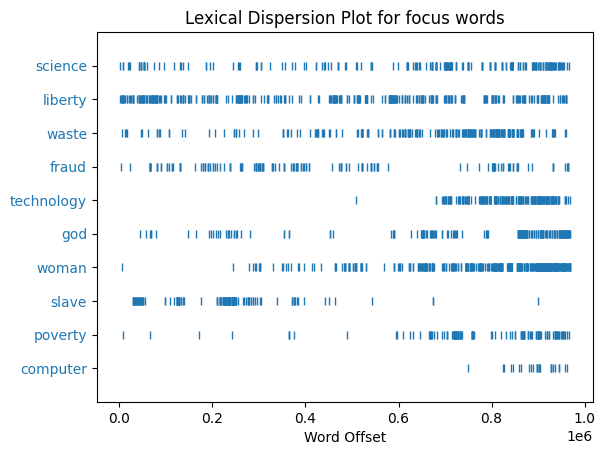

In [10]:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, focus_words, ignore_case=True, title='Lexical Dispersion Plot for focus words')
plt.show()

<Figure size 1200x900 with 0 Axes>

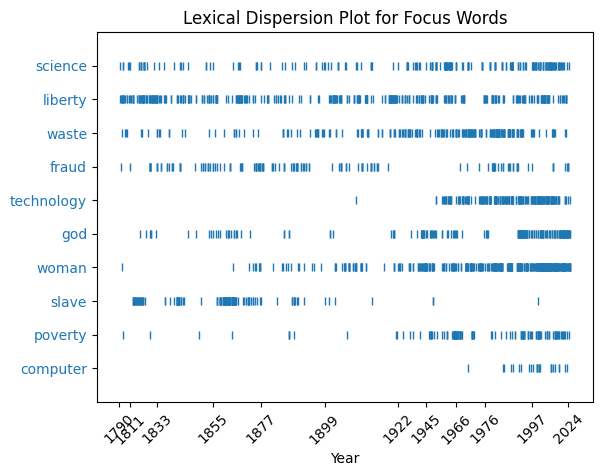

In [11]:


# Compute the lengths of each text
text_lengths = [len(text) for text in sorted_texts]

# Compute cumulative offsets
cumulative_offsets = np.cumsum([0] + text_lengths[:-1])  # Start at 0 for the first year

# Determine indices for spaced ticks
num_ticks = 12
indices = np.linspace(0, len(cumulative_offsets) - 1, num=num_ticks, dtype=int)

# Subset offsets and years for tick marks
selected_offsets = cumulative_offsets[indices]
selected_years = [sorted_years[i] for i in indices]

# Plot with updated axis
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, focus_words, ignore_case=True, title='Lexical Dispersion Plot for Focus Words')

# Set the horizontal axis
plt.xticks(selected_offsets, selected_years, rotation=45)
plt.xlabel("Year")
plt.show()


In [12]:
df = pd.DataFrame({
    'sorted_year': sorted_years,
    'text_length': text_lengths
})


In [14]:
df

,sorted_year,text_length
0,1790,487
1,1790,617
2,1791,956
3,1792,954
4,1793,885
...,...,...
240,2019,2973
241,2020,3418
242,2022,3929
243,2023,4631


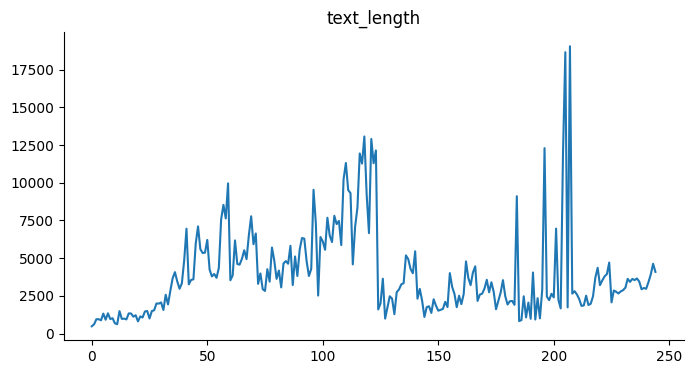

In [ ]:
# @title text_length

from matplotlib import pyplot as plt
df['text_length'].plot(kind='line', figsize=(8, 4), title='text_length')
plt.gca().spines[['top', 'right']].set_visible(False)

In [15]:
# Determine the maximum length of texts
max_length = max(len(text) for text in sorted_texts)

# Define the out-of-vocabulary (OOV) token
oov_token = "[OOV]"

# Pad each text to the maximum length
padded_texts = [
    text + [oov_token] * (max_length - len(text)) # Changed oov_token to [oov_token] to make it a list
    for text in sorted_texts
]

# Verify the result
print(f"All texts are now of length {max_length}:")
print(padded_texts[:3])  # Display the first 3 padded texts

All texts are now of length 19049:
[['embrace', 'great', 'satisfaction', 'opportunity', 'present', 'congratulate', 'present', 'favorable', 'prospect', 'public', 'affair', 'recent', 'accession', 'important', 'state', 'north', 'carolina', 'constitution', 'unite', 'state', 'official', 'information', 'receive', 'rise', 'credit', 'respectability', 'country', 'general', 'increase', 'good', 'toward', 'government', 'union', 'concord', 'peace', 'plenty', 'bless', 'circumstance', 'auspicious', 'eminent', 'degree', 'national', 'prosperity', 'resume', 'consultation', 'general', 'good', 'derive', 'encouragement', 'reflection', 'measure', 'last', 'session', 'satisfactory', 'constituent', 'novelty', 'difficulty', 'work', 'allow', 'hope', 'still', 'realize', 'expectation', 'secure', 'blessing', 'gracious', 'providence', 'place', 'within', 'reach', 'course', 'present', 'important', 'session', 'call', 'cool', 'deliberate', 'exertion', 'patriotism', 'firmness', 'wisdom', 'among', 'many', 'interesting', '

In [16]:
all_words = []
for text in padded_texts:
    # text is a list of words, so we can directly extend all_words
    all_words.extend(text)
word_counts = Counter(all_words)


In [30]:
focus_words=["liberty","waste","fraud","god","woman","slave","poverty","education","science","technology","computer"]

<Figure size 1200x900 with 0 Axes>

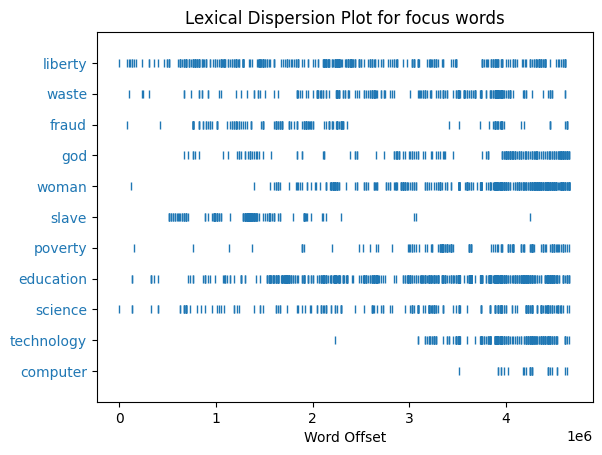

In [31]:
# Finally, call the `dispersion_plot` function on the joined string:
plt.figure(figsize=(12, 9))
dispersion_plot(all_words, focus_words, ignore_case=True, title='Lexical Dispersion Plot for focus words')
plt.show()